<a href="https://colab.research.google.com/github/JosenildoJunior/StatPyDataScience/blob/main/Desafio_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise exploratória em dados do Ifood**

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal


**O objetivo é realizar uma análise exploratória desses dados.**

## **Importando os dados**

Nessa parte iremos importar todas as bibliotecas que iremos precisar para realizar nossa analise e também os dados, dito isso vamos seguir para a importação das bibliotecas e posteriormente dos dados

In [ ]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
import scipy.stats

# Importando o skew
from scipy.stats import skew

Com as bibliotecas importadas podemos seguir para a importação dos dados propriamente dito

In [ ]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Estatística para ciência de dados/mkt_data.csv')

# Observando os primeiro registros
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


Agora podemos partir para a proxima etapa

## **Análise inicial**

Nessa parte do desafio responderemos algumas perguntas com o intuito de enterdermos um pouco mais de como esses dados se comportam, para isso responderemos as seguintes perguntas:

- Quantos dados temos? Linhas e colunas
- Quais são as colunas numéricas?
- Temos duplicados na nossa base? Se tivermos, retire-os
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
- Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

Agora que já sabemos as perguntas, vamos partir para a resolução das mesmas.

### **Quantos dados temos? Linhas e colunas**

In [ ]:
# Observando as dimensões dos dados
df.shape

(2205, 44)

Dessa forma, podemos observar que temos 2205 linhas e 44 colunas nessa base de dados.

### **Quais são as colunas numéricas?**

In [ ]:
# Observando o tipo de dado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Agora vamos observar apenas as variáveis numéricas.

In [ ]:
# Selecionando apenas as numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics).columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

Dessa forma, podemos perceber que todas as variáveis presentes nessa lista são variáveis numéricas.



### **Temos duplicados na nossa base? Se tivermos, retire-os**

In [ ]:
# Verificando o valores duplicados
df.duplicated().sum()

0

Podemos observar que nesta base não existem valores duplicados. Sendo assim, podemos seguir adiante.

### **Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?**

In [ ]:
# Observando os valores ausentes
def percent_ausentes(df_medias):
    p_faltantes = df_medias.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df_medias.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

percent_ausentes(df)

,Variavéis,% de ausentes
33,education_Basic,0.975510
31,marital_Widow,0.965533
32,education_2n Cycle,0.910204
27,marital_Divorced,0.895692
35,education_Master,0.834921
36,education_PhD,0.784127
29,marital_Single,0.783673
30,marital_Together,0.742404
28,marital_Married,0.612698
34,education_Graduation,0.495238


Essa função nos retorna a porcentagem de valores ausentes presentes em cada coluna. Podemos observar que existem variáveis com a grande maioria de registros ausentes, como, por exemplo, education_basic, marital_widow e education_2n Cycle, que possuem mais de 90% dos valores ausentes. As variáveis marital_divorced e education_master possuem mais de 80%. Variáveis como education_Phd, marital_single e marital_together possuem um pouco mais de 70% de valores ausentes, enquanto as variáveis marital_married e education_graduation possuem, respectivamente, 61% e 49% de valores ausentes.

Pelo expressivo número de valores ausentes, é possível levantar a hipótese de que os usuários não davam tanta importância para o preenchimento dessas características e acabavam deixando em branco.

Essas variáveis que, em sua grande maioria, possuem valores ausentes, não vão nos dizer nada a respeito dos nossos dados. Portanto, no momento, elas podem ser retiradas do nosso dataset. Vamos aproveitar para retirar também a coluna "Unnamed", já que ela não será utilizada.

In [ ]:
# Realizando a exclusão das colunas
#df = df.drop(['Unnamed: 0','education_Basic', 'marital_Widow', 'education_2n Cycle', 'marital_Divorced', 'education_Master',
              'education_PhD', 'marital_Single', 'marital_Together', 'marital_Married', 'education_Graduation'], axis = 1)

Agora vamos observar novamente os valores ausentes.

In [ ]:
# Observando os valores ausentes
def percent_ausentes(df_medias):
    p_faltantes = df_medias.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df_medias.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

percent_ausentes(df)

,Variavéis,% de ausentes
0,Income,0.0
17,AcceptedCmp5,0.0
31,kids,0.0
30,education_level,0.0
29,marital_status,0.0
28,AcceptedCmpOverall,0.0
27,MntRegularProds,0.0
26,MntTotal,0.0
25,Customer_Days,0.0
24,Age,0.0


Com os valores ausentes tratados, podemos seguir adiante.

#### *Outra forma de tratar esse problema*

Existe outra forma de tratar esse problema. Vamos observar um pouco mais cada uma dessas variáveis que possuem valores nulos expressivos, como por exemplo a coluna "education_PhD"

In [ ]:
#Observando os valores
df.education_PhD.value_counts()

5.0    476
Name: education_PhD, dtype: int64

Podemos observar que essa coluna possui 476 valores 5.0 e o restante é nulo. Isso pode indicar que as pessoas que não possuem determinadas características podem ser nulas. Sendo assim, é possível transformar essa variável em uma variável booleana do tipo 1 se tiver a característica e 0 se não tiver.

In [ ]:
#selecionando colunas com nulos
colunas_com_nulos = ["marital_Divorced"
, "marital_Married"
, "marital_Single"
, "marital_Together"
, "marital_Widow"
, "education_2n Cycle"
, "education_Basic"
, "education_Graduation"
, "education_Master"
, "education_PhD"]

In [ ]:
# Substituindo por booleano
for item in colunas_com_nulos:

# Se for nulo, substituimos por 0, caso contrário substituimos por 1
  df["booleano"+str(item)] = np.where(df[item].isnull(), 0, 1)

In [ ]:
# Observando os dados
df.head()

Dessa forma, podemos abordar o tratamento dessa variável de uma maneira que nos permita utilizar essas variáveis para possíveis análises no futuro. No momento, vamos adotar essa estratégia.

### **Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?**

Como este dataset possui bastante colunas, vamos utilizar o seguinte método para que todas as colunas sejam exibidas corretamente.

In [ ]:
# Configurar para exibir todas as colunas
pd.set_option('display.max_columns', None)

Vamos utilizar o método 'describe' para observar essas informações de todas as colunas numéricas de uma só vez.

In [ ]:
# Resumo estatístico
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,562.764626,518.707483,0.29932,0.948753,562.764626
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,575.936911,553.847248,0.68044,0.749231,575.936911
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,4.000000,-283.000000,0.00000,0.000000,4.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,56.000000,42.000000,0.00000,0.000000,56.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,343.000000,288.000000,0.00000,1.000000,343.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,964.000000,884.000000,0.00000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,2491.000000,2458.000000,4.00000,3.000000,2491.000000


Dessa forma, podemos observar algumas medidas interessantes, como a média de renda, que é de 51.622.

Na coluna "recency", que representa o número de dias desde a última compra, a média é de 49 dias, e o maior número de dias que alguém está sem comprar foi 99 dias.

A média de gastos nos últimos dois anos em vinho é bem superior à de frutas, peixes e doces. No entanto, podemos notar uma mediana bem diferente da média, o que pode ser um indicativo de que existem outliers nessas colunas.

Na coluna "NumWebPurchases", que indica o número de compras através de websites, a média de pedidos é de 4, que por sinal está bem próxima da mediana.

Aparentemente, a maior média de pedidos é feita diretamente na loja, já que eles atingem uma média de 5 pedidos.

A média de idade dessa base é de 51 anos.

Essas são algumas informações que foram possíveis tirar dos dados nesse momento. Vamos seguir com a nossa análise.

## **Entendendo o perfil dos clientes**

Nessa parte vamos utilizar alguns conceitos estatisticos para tentar entender melhor o perfil dos clientes nessa base, para isso precisamos estabelecer algumas perguntas como por exemplo:

- Qual é o maior salário encontrado na nossa base?
- Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
- Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
- Quantos clientes temos em cada estado civil? Veja na coluna marital_status

Agora que já sabemos as perguntas, vamos partir para a resolução das mesmas.

### **Qual é o maior salário encontrado na nossa base?**

Vamos utilizar novamente a função 'describe()' para obtermos um resumo estatístico da nossa variável renda.

In [ ]:
# Resumo estatístico
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

Podemos observar que a maior renda presente nessa base é de 113 mil, e a menor é de 1730.

### **Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?**

Para respondermos a essa pergunta, será necessário a criação de um gráfico de Distribuição.

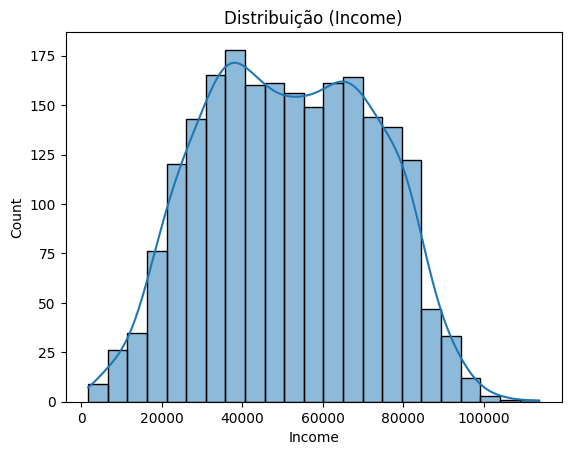

In [ ]:
# Criando o gráfico
sns.histplot(df['Income'], kde = True)
plt.title("Distribuição (Income)");

Podemos observar que realmente existem pessoas que ganham muito e outras que ganham pouco.

Vamos verificar a presença de outliers nessa coluna.

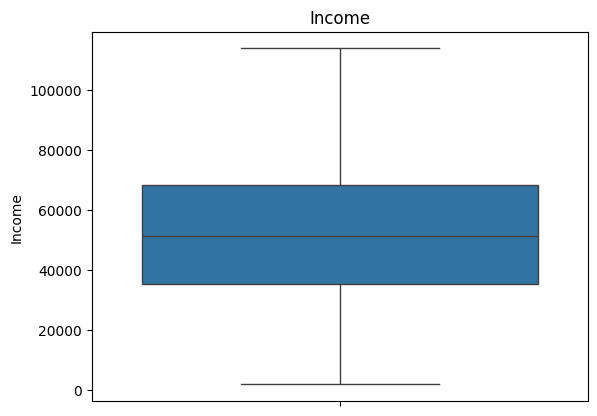

In [ ]:
# Criando o boxplot
sns.boxplot(df['Income'])
plt.title("Income");

Com esse boxplot, podemos observar que nessa coluna, não existem outliers. Podemos afirmar que, provavelmente, a média e a mediana serão bem próximas uma da outra.

In [ ]:
# Calculando a média
media_income = df['Income'].mean().round(2)

# Calculando a mediana
mediana_income = df['Income'].median().round(2)

# Exibindo os valores
print(f"A média é {media_income} e a mediana é {mediana_income}")

A média é 51622.09 e a mediana é 51287.0


Como suspeitamos anteriormente, a média e a mediana estão próximas. Agora, vamos observar a dispersão dos dados.

In [ ]:
# Calculando o desvio padrão
desvio = df['Income'].std().round(2)

# Calculando o coeficiente de variância
coef_var =  round((desvio/df['Income'].mean())*100, 2)

print(f"Os dados diferem da média cerca de {desvio} unidades. Essa diferença representa cerca de {coef_var}% da média.")

Os dados diferem da média cerca de 20713.06 unidades. Essa diferença representa cerca de 40.12% da média.


Com isso, podemos afirmar que realmente os dados estão variando bastante. No entanto, como vimos anteriormente, eles estão bem distribuídos, quase assumindo uma distribuição normal. Vamos observar o skew dessa coluna.

In [ ]:
# Verificando assimetria
df["Income"].skew()

0.013164263414417078

Podemos observar que o skew está bem próximo de 0, o que seria uma distribuição normal. No entanto, nesse caso, o skew é de 0,13, indicando assim que os dados apresentam uma leve assimetria positiva à direita. Isso significa que existem mais valores maiores que valores menores.

Vamos tentar observar a correlação entre a idade e renda para verificarmos se uma pessoa mais velha tende a ganhar mais.

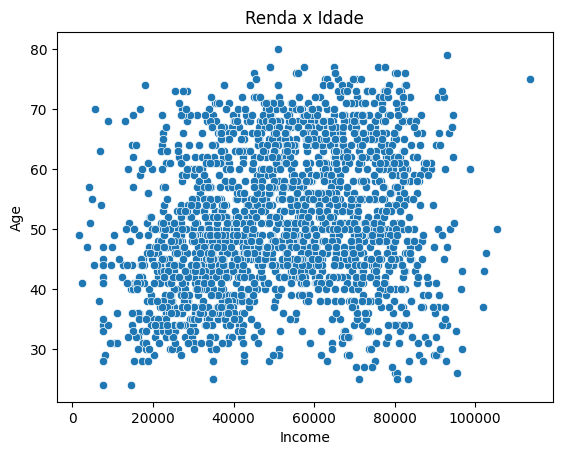

In [ ]:
# Criando o gráfico de dispersão
sns.scatterplot(data = df, x = 'Income', y = 'Age')
plt.title("Renda x Idade");

Aparentemente, a renda está bem distribuída em relação à idade. Existem pessoas novas que recebem muito e pessoas mais velhas que também recebem muito.

### **Nossos clientes tem níveis de educação maiores ou menores?**

Vamos utilizar o 'value_counts' para identificarmos quantos registros existem em cada categoria.

In [ ]:
# Observando os valores na coluna
df['education_level'].value_counts().sort_values(ascending = False)

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: education_level, dtype: int64

Podemos perceber então que a maior parte dos clientes presentes nessa base possuem graduação, seguidos por PhD. Então, podemos afirmar que a maior parte dos clientes possui um bom nível educacional.

### **Quantos clientes temos em cada estado civil?**

In [ ]:
# Observando os valores na coluna
df['marital_status'].value_counts().sort_values(ascending = False)

Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: marital_status, dtype: int64

A maior parte dos nossos clientes são casados, seguidos pelo status de "together".

## **Observando a correlação dos dados**

Para entendermos melhor como esses dados se correlacionam vamos tentar responder as seguintes perguntas:

- Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?
- Pessoas casadas tendem a gastar mais ?
- As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?
- Pessoas que têm um maior salário gastam mais?
- Pessoas que reclamam se tornam detratoras (Deixam de comprar na plataforma)

### **Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?**

In [ ]:
# Agrupando os dados e observando a média
df.groupby("marital_status")["kids"].mean().sort_values(ascending=False)

marital_status
Divorced    1.008696
Together    0.980634
Married     0.967213
Widow       0.881579
Single      0.859539
Name: kids, dtype: float64

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("marital_status")["kids"].median().sort_values(ascending=False)

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Podemos observar que as médias da quantidade de filhos estão bem próximas, porém a média de filhos por pessoa divorciada é um pouco maior que as demais. Vamos observar o boxplot para entendermos melhor.

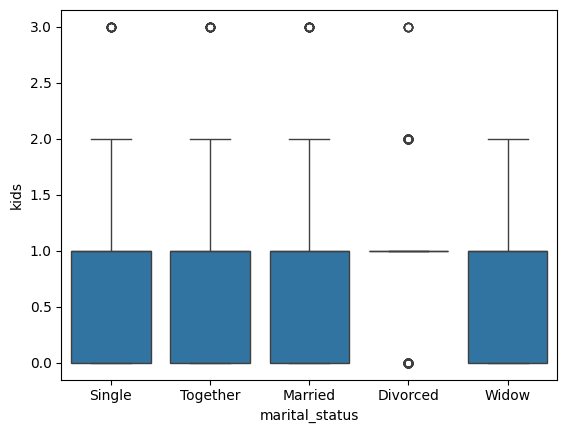

In [ ]:
# Criando o boxplot
sns.boxplot(x = 'marital_status', y = 'kids', data = df);

Podemos observar que, realmente, cada atributo apresenta a mesma mediana e boxplots bem semelhantes em quase todos os casos. É possível observar uma sobreposição nos boxplots. Dessa forma, para podermos determinar com 100% de certeza se realmente existem diferenças entre as médias, seria necessária a realização de um teste de hipóteses.

### **Pessoas casadas tendem a gastar mais ?**

In [ ]:
# Agrupando os dados e observando a média
df.groupby("marital_status")["expenses"].mean().sort_values(ascending=False)

marital_status
Widow       672.105263
Single      569.274633
Divorced    569.052174
Together    564.350352
Married     546.649883
Name: expenses, dtype: float64

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("marital_status")["expenses"].median().sort_values(ascending=False)

marital_status
Widow       596.0
Divorced    361.0
Married     341.0
Together    325.0
Single      303.0
Name: expenses, dtype: float64

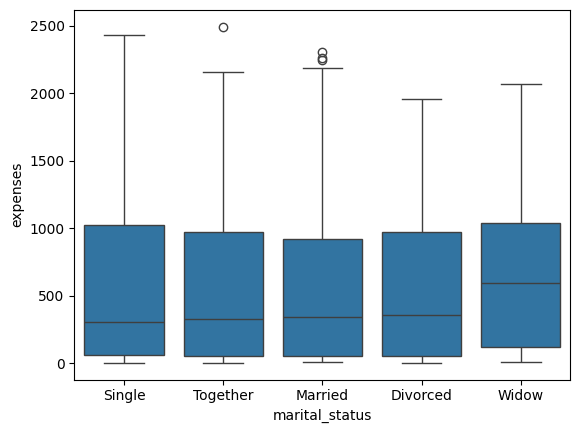

In [ ]:
# Criando o boxplot
sns.boxplot(x = 'marital_status', y = 'expenses', data = df);

Pessoas dos status "Widow" apresentam tanto uma média quanto uma mediana maior referência aos gastos. Podemos confirmar isso observando o boxplot. Inclusive, o "Widow" apresenta um terceiro quartil maior que "divorced", "married" e "together" e um terceiro quartil bem próximos entre "widow" e "single".

### **As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?**

Vamos observar a média de gastos, agrupados pelo número de filhos.

In [ ]:
# Agrupando os dados
df.groupby("kids")["expenses"].mean().sort_values(ascending=False)

kids
0    1041.207006
1     434.530576
3     237.380000
2     221.568675
Name: expenses, dtype: float64

In [ ]:
# Agrupando os dados e observando a mediana
df.groupby("kids")["expenses"].median().sort_values(ascending=False)

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

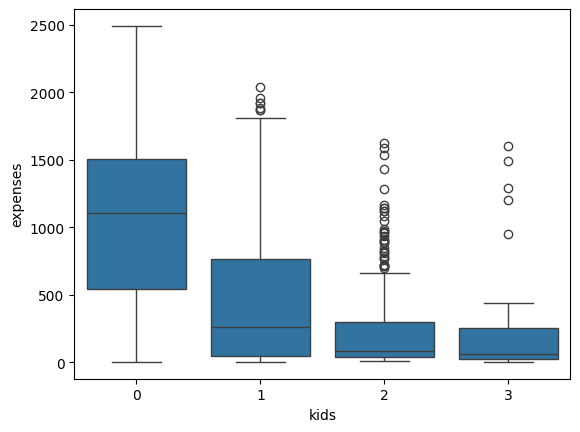

In [ ]:
# Criando o boxplot
sns.boxplot(x = 'kids', y = 'expenses', data = df);

Na nossa base, pessoas que não têm filhos tendem a gastar mais. Quanto mais filhos as pessoas têm, menos gastos nossos clientes estão tendo. Porém, ao observarmos o boxplot novamente, podemos observar a existência de sobreposição. Logo, para descobrirmos se realmente existem essas diferenças, seria necessário aplicarmos um teste de hipóteses.

#### **A equipe de marketing pensou em fazer campanhas direcionadas ao grupo de pessoas com filho (independente da quantidade), porém precisamos comprovar se de fato as médias de gastos dos grupos é diferente.**

Dito isso: Agrupe todas as pessoas que tem filhos em um grupo chamado "com filhos" e faça uma comparação da média de gastos de pessoas sem filhos e pessoas com filhos.

Vamos começar realizando o agrupamento das pessoas que têm e que não têm filhos.

In [ ]:
# DataFrame com pessoas que têm filhos
df_com_filhos = df[df['kids'] > 0][['kids', 'expenses']]

# DataFrame com pessoas que não têm filhos
df_sem_filhos = df[df['kids'] == 0][['kids', 'expenses']]

In [ ]:
# Exibindo os DataFrames com filhos
df_com_filhos.head()

,kids,expenses
1,2,21
3,1,48
4,1,407
5,1,702
6,1,563


In [ ]:
# Exibindo os DataFrames sem filhos
df_sem_filhos.head()

,kids,expenses
0,0,1529
2,0,734
10,0,45
11,0,1072
13,0,41


Como queremos saber se existe de fato uma diferença entre os gastos, vamos aplicar um teste de hipótese para média com duas amostras. Logo, nossas hipóteses serão:

H0: média com filhos = média sem filhos

Ha: média com filhos ≠ média sem filhos

Estamos diante de um teste bicaudal.

Dito isso, vamos realizar as importações necessárias.

In [ ]:
# importando a função
from scipy import stats

Vamos observar a quantidade de dados presente em cada um dos novos dataframes.

In [ ]:
# Exibindo os valores
print(f"Número de pessoas com filho {df_com_filhos.count()}\n Número de pessoas sem filho {df_sem_filhos.count()}")

Número de pessoas com filho kids        1577
expenses    1577
dtype: int64
 Número de pessoas sem filho kids        628
expenses    628
dtype: int64


Podemos ver que nossas amostras têm dados que garantem uma normalidade, segundo o teorema do limite central. Dito isso, vamos avançar para os próximos passos.

Agora vamos prosseguir para os cálculos.

In [ ]:
# Realizando o teste t
_, p_valor = stats.ttest_ind(df_com_filhos, df_sem_filhos)

# Pegando o primeiro p-valor
p_valor = p_valor[1]

# Nível de significância
alpha = 0.05

# Conclusões
if p_valor < alpha:
    print("Rejeitar H0: Há evidências de que existe diferença na média de gastos de pessoas com e sem filhos.")
else:
    print("Falha em rejeitar H0: Não há evidências suficientes para afirmar que há diferença na média de gastos de pessoas com e sem filhos.")

# Exibindo o p-valor
print(p_valor)

Rejeitar H0: Há evidências de que existe diferença na média de gastos de pessoas com e sem filhos.
5.171525024868465e-156


Segundo nosso teste de hipóteses e um nível de significância de 0,05, rejeitamos a hipótese nula. Logo, podemos afirmar que as médias são diferentes. É importante frisar que o valor p foi muito baixo; portanto, mesmo se fosse um nível de significância menor, o resultado não mudaria.

Dito isso, vamos observar a média de ambas as amostras.

In [ ]:
# Exibindo as médias
print(f"Média de gastos de pessoas com filhos: {df_com_filhos['expenses'].mean()}\nMédia de gastos de pessoas sem filhos: {df_sem_filhos['expenses'].mean()}")

Média de gastos de pessoas com filhos: 372.23715916296766
Média de gastos de pessoas sem filhos: 1041.2070063694268


Existe uma clara diferença entre os gastos médios de uma pessoa com e uma pessoa sem filhos.

#### **Agora, compare os grupos de pessoas com filhos. O time de marketing nos pediu para verificar se há diferenças de gastos (expenses) em quem tem 1, 2, 3 ou mais filhos para que eles possam afunilar mais ainda a campanha. A média desses grupos é diferente? Qual(is) tem menor média?**

Para começarmos, vamos observar a média desses grupos.

In [ ]:
# Agrupando os dados
df.groupby("kids")["expenses"].mean().sort_values(ascending=False)

kids
0    1041.207006
1     434.530576
3     237.380000
2     221.568675
Name: expenses, dtype: float64

Nesse primeiro momento, podemos observar que realmente os grupos apresentam médias diferentes, mas será que essas diferenças são estatisticamente significativas? Vamos observar.

Como temos 3 grupos, podemos aplicar o teste ANOVA, mas antes vamos observar se respeitamos todos os requisitos para a aplicação desse teste, sendo eles:

Premissas:

- Amostras aleatórias
- Grupos independentes
- A variável dependente é contínua
- A variável independente é categórica
- Seus dados de amostra devem seguir uma distribuição normal ou cada grupo deve ter variações aproximadamente iguais (se não tiver, usar o ANOVA de Welch).

Precisamos observar a variância desses dados. Para isso, vamos aplicar o teste de Bartlett, mas antes vamos agrupar os dados das pessoas que têm 1, 2 e 3 filhos.

In [ ]:
# DataFrame com pessoas que têm 1 filho
df_um_filho = df[df['kids'] == 1][['expenses']]

# DataFrame com pessoas que têm 2 filhos
df_dois_filhos = df[df['kids'] == 2][['expenses']]

# DataFrame com pessoas que têm 3 filhos
df_tres_filhos = df[df['kids'] == 3][['expenses']]

Agora podemos aplicar o teste propriamente dito, lembrando que nossas hipóteses são:

- H0: as variâncias são estatisticamente iguais
- Ha: as variâncias são estatisticamente diferentes

In [ ]:
# Importando o teste de barlett
from scipy.stats import bartlett

# Execute o teste de Bartlett para verificar a homogeneidade das variâncias
statistic, p_value = bartlett(df_um_filho['expenses'] ,df_dois_filhos['expenses'], df_tres_filhos['expenses'])

# Exiba o resultado do teste
print(f"Estatística de Bartlett: {statistic}")
print(f"Valor p: {p_value}\n")

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.")

Estatística de Bartlett: 102.21719770243517
Valor p:6.365280420300725e-23

Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.


Obtivemos um valor p bem baixo após aplicarmos o nosso teste. Portanto, rejeitamos a hipótese nula a um nível de significância de 0,05, o que nos leva a concluir que as variâncias são diferentes.

Com esse resultado do nosso teste, nossos dados não respeitam o último dos requisitos. Nesse caso, vamos recorrer ao ANOVA de Welch. Dito isso, vamos seguir adiante.

In [ ]:
# Realizando a instalação
!pip install pingouin

In [ ]:
# Importando a biblioteca pingouin
import pingouin as pg

# Pegando apenas os dados onde a coluna 'kids' é diferente de 0
df_com_filhos = df[df['kids'] != 0]

# Execute o teste de ANOVA de Welch
anova_welch = pg.welch_anova(dv='expenses', between='kids', data=df_com_filhos)

# Pegue apenas o valor p do resultado
p_value = anova_welch['p-unc'].values

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. Pelo menos um grupo difere dos outros.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. Não existe diferença entre os grupos.")

Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. Pelo menos um grupo difere dos outros.


Após a aplicação do nosso teste a um nível de significância de 0,05, rejeitamos a hipótese nula. Logo, podemos concluir que os grupos apresentam diferenças entre si.

Nossa missão agora é identificar quais grupos apresentam essas diferenças. Como os grupos apresentam variâncias diferentes, não podemos aplicar o teste de Tukey. Sendo assim, vamos aplicar o teste de Games-Howell. Dito isso, vamos seguir adiante.

Vamos observar quantos registros temos para cada grupo de filhos.

In [ ]:
# Observando quantos registros temos em cada grupo
df_com_filhos['kids'].value_counts()

1    1112
2     415
3      50
Name: kids, dtype: int64

Estamos respeitando o teorema do limite central. Logo, vamos seguir adiante para a aplicação do teste.

In [ ]:
# Realizando o teste de Games-Howell
games_howell_results = pg.pairwise_gameshowell(df_com_filhos, dv='expenses', between='kids')

# Exibindo o resultado
games_howell_results

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,434.530576,221.568675,212.961901,19.678256,10.822194,1152.588538,2.596812e-13,0.513077
1,1,3,434.530576,237.380000,197.150576,56.823741,3.469511,55.099957,2.888048e-03,0.437688
2,2,3,221.568675,237.380000,-15.811325,56.988869,-0.277446,55.722906,9.584865e-01,-0.052201


Importante frisar que o valor de alpha é 5e-02, que é igual a 0,05.

Comparação entre os grupos 1 e 2:

- A média de gastos das pessoas com 1 filho é 434,53 e com 2 filhos é 221,56.
- A diferença entre esses grupos é de 212,96.
- O erro padrão da diferença é de 19,67.
- A estatística do teste é de 10,82.
- Os graus de liberdade são de 1152,58.
- O valor p é de 2,59e-13, o que o torna bem menor que nosso alpha. Portanto, rejeitamos H0, logo podemos afirmar que existe diferença estatística entre os grupos.
- O tamanho do efeito de Hedges é de 0,51.

Comparação entre os grupos 1 e 3:

- A média de gastos das pessoas com 1 filho é 434,53 e com 3 filhos é 237,38.
- A diferença entre esses grupos é de 197,15.
- O erro padrão da diferença é de 56,82.
- A estatística do teste é de 3,46.
- Os graus de liberdade são de 55,09.
- O valor p é de 2,88e-03, o que o torna menor que nosso alpha. Portanto, rejeitamos H0, logo podemos afirmar que existe diferença estatística entre os grupos.
- O tamanho do efeito de Hedges é de 0,43.

Comparação entre os grupos 2 e 3:

- A média de gastos das pessoas com 2 filhos é 221,56 e com 3 filhos é 237,38.
- A diferença entre esses grupos é de -15,81.
- O erro padrão da diferença é de 56,98.
- A estatística do teste é de -0,27.
- Os graus de liberdade são de 55,72.
- O valor p é de 9,58e-01, o que o torna maior que nosso alpha. Portanto, falhamos em rejeitar H0, logo podemos afirmar que não existe diferença estatística entre os grupos.
- O tamanho do efeito de Hedges é de -0,05.

**Conclusões**

Após os testes, podemos notar que existem diferenças nos gastos das pessoas:

- 1 filho x 2 filhos: As pessoas com 1 filho apresentam uma média de gastos maior do que as pessoas com 2 filhos.
- 1 filho x 3 filhos: As pessoas com 1 filho apresentam uma média de gastos maior do que as pessoas com 3 filhos.
- 2 filhos x 3 filhos: Apresentam médias estatisticamente iguais.
-------------------
O grupo com a menor média de gastos são pessoas com 2 e 3 filhos, sendo que pessoas com 2 filhos apresentam a menor média de todas.

### **Pessoas que têm um maior salário tende a gastar mais?**

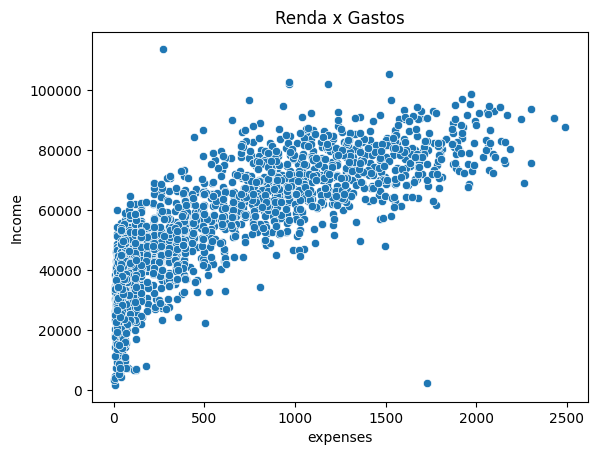

In [ ]:
# Criando o gráfico de dispersão
sns.scatterplot(data = df, x = 'expenses', y = 'Income')
plt.title("Renda x Gastos");

Podemos observar que pessoas que ganham acima de 35 mil tendem a gastar cada vez mais conforme o aumento da renda.

### **Pessoas que reclamam voltam a comprar ?**

Queremos agora saber se o fato de uma pessoa reclamar na plataforma a torna detratora (detrator aqui seria não comprar mais em nossa plataforma).

Dito isso, vamos começar observando os gastos de uma pessoa que reclama.

In [ ]:
# Observando a quantidade de reclamações
df['Complain'].value_counts()

0    2185
1      20
Name: Complain, dtype: int64

Temos 20 pessoas que reclamaram nos últimos dois anos, agora vamos observar a média de gastos.

In [ ]:
# Agrupando os dados e observando a média
df.groupby("Complain")["expenses"].mean().sort_values(ascending=False)

Complain
0    564.58032
1    364.40000
Name: expenses, dtype: float64

Aqui podemos notar que as pessoas que fizeram alguma reclamação têm uma média de gastos menor do que as que não apresentaram.

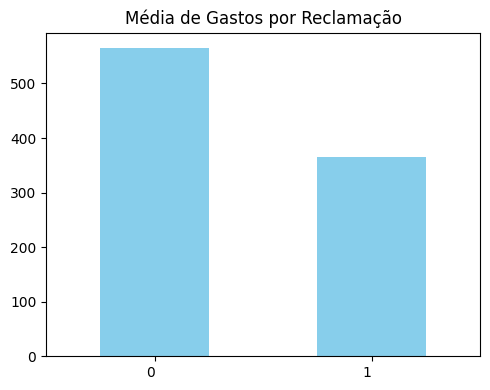

In [ ]:
# Agrupando os dados e calculando a média das despesas para cada reclamação
gastos_reclamacao = df.groupby("Complain")["expenses"].mean().sort_values(ascending=False)

# Definindo o tamanho da figura
plt.figure(figsize=(5, 4))

# Criando o gráfico de barras
gastos_reclamacao.plot(kind='bar', color='skyblue')

# Definindo o título do gráfico
plt.title('Média de Gastos por Reclamação')

# Definindo o rótulo do eixo x
plt.xlabel('')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=0, ha='right')

# Ajustando o layout do gráfico
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Dessa forma, podemos observar de maneira mais visual a diferença da média de gastos entre as pessoas que apresentaram alguma reclamação e as que não apresentaram. A pergunta que resta é: será que realmente uma pessoa que reclama deixa de comprar em nossa plataforma? Para descobrirmos, vamos aplicar uma tese de hipótese.

#### **Teste de hipótese paramétrico**

Vamos começar definindo as nossas hipóteses. Se uma pessoa se torna detratora, nesse caso, ela basicamente deixará de comprar em nossa plataforma. Portanto, automaticamente, os gastos dela tendem a ser menores do que os das pessoas que compram. Logo, podemos assumir as seguintes hipóteses:

H0: média de gastos de pessoas que reclamaram = média de gastos de pessoas que não reclamaram

H1: média de gastos de pessoas que reclamaram ≠ média de gastos de pessoas que não reclamaram

Estamos diante de um teste bicaudal

Vamos separar os dados entre as pessoas que reclamaram e as que não reclamaram.

In [ ]:
# Pessoas que apresentaram alguma reclamação
reclamacao = df[df['Complain'] == 1][['Complain', 'expenses']]

# Pessoas que não apresentaram reclamação
sem_reclamacao = df[df['Complain'] == 0][['Complain', 'expenses']]

# Exibindo a quantidade de registros em cada uma dessas amostras
print(f'Reclamação: {len(reclamacao)}\nSem reclamação: {len(sem_reclamacao)}')

Reclamação: 20
Sem reclamação: 2185


Dito isso, vamos observar a distribuição dos dados para escolhermos qual teste deve ser aplicado.

In [ ]:
# Importando o skew
from scipy.stats import skew

Com o `skew` importado, podemos verificar a assimetria dos dados.

In [ ]:
# Calculando o skew da amostra A
coeficiente_assimetria_a = skew(reclamacao['expenses'])

# Calculando o skew da amostra B
coeficiente_assimetria_b = skew(sem_reclamacao['expenses'])

# Exibindo o resultado
print(f"Skew da amostra A: {coeficiente_assimetria_a}\nSkew da amostra B: {coeficiente_assimetria_b}")

Skew da amostra A: 0.9208589705273538
Skew da amostra B: 0.9116318754969026


Obtivemos um skew bastante alto. Levando em consideração que quanto mais próximo de zero, mais a distribuição se aproxima de uma normal, ambas as distribuições estão bem longe de uma normal.

Agora, vamos observar as variâncias desses dados. Como nossos dados não seguem uma distribuição normal, vou utilizar o teste de Levene em vez do teste de Bartlett, pois o teste de Levene é menos sensível à normalidade dos dados.

In [ ]:
# Importando o teste de levene
from scipy.stats import levene

# Aplique o teste de Levene para comparar as variâncias
statistic, p_value = levene(reclamacao['expenses'], sem_reclamacao['expenses'])

# Exiba o resultado do teste
print(f"Estatística de Levene: {statistic}")
print(f"Valor p: {p_value}\n")

# Nível de significância
alpha = 0.05

# Conclusões
if p_value < alpha:
    print("Rejeitar H0: Há evidências suficientes para rejeitar a hipótese nula. As variâncias são diferentes.")
else:
    print("Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.")

Estatística de Levene: 2.443754914525847
Valor p: 0.11813710491195226

Falha em rejeitar H0: Não temos evidências suficientes para rejeitar a hipótese nula. As variâncias são iguais.


Então, chegamos à conclusão de que nossos dados apresentam variâncias semelhantes. Dito isso, neste caso, para o teste paramétrico, vamos utilizar o teste t de Welch, já que essa modificação do teste t é menos sensível à normalidade.

In [ ]:
# Importando o tese t de welch
from scipy.stats import ttest_ind

# Aplicando o teste t de Welch, utilizei o equal_var = True pois vimos que as variâncias são iguais
resultado_teste = ttest_ind(reclamacao['expenses'], sem_reclamacao['expenses'], equal_var=True)

# Examine o resultado
valor_p = resultado_teste.pvalue
print("Valor p do teste t de Welch:", valor_p)

# Nível de significância
alpha = 0.05

# Conclusões
if valor_p < alpha:
    print("Rejeitar H0: As médias das duas amostras são estatisticamente diferentes.")
else:
    print("\nFalha em rejeitar H0: As médias das duas amostras NÃO são estatisticamente diferentes.")

Valor p do teste t de Welch: 0.12180935471513422

Falha em rejeitar H0: As médias das duas amostras NÃO são estatisticamente diferentes.


Após a realização do teste a um nível de significância de 0,05, falhamos em rejeitar a hipótese nula. Logo, podemos afirmar que não temos evidências suficientes para concluir que as médias de gastos das pessoas que reclamam são diferentes das médias das pessoas que não reclamam.

Como temos um número de elementos bastante reduzido em nossa amostra, vamos aplicar um teste não paramétrico para observarmos o resultado.

#### **Teste de hipótese não paramétrico**

Vamos aplicar o teste de Mann-Whitney para observarmos o resultado. Como já sabemos que as amostras não seguem uma distribuição normal e que apresentam variâncias semelhantes, podemos partir diretamente para o teste.

In [ ]:
# Importando o teste de Mann-whitney
from scipy.stats import mannwhitneyu

# Aplicando o teste de Mann-Whitney, Utilizei o 'alternative = two-sided' pois se trata de um teste bicaudal
stat, p_valor = mannwhitneyu(reclamacao['expenses'], sem_reclamacao['expenses'], alternative = 'two-sided')

# Exibindo os resultados
print("Estatística do teste de Mann-whitney:", stat)
print(f"Valor p: {p_valor}\n")

# Definindo o alpha
alpha = 0.05

# Conclusões
if p_valor < alpha:
    print("Rejeitar H0: Há evidências suficientes para concluir que existe diferenças entre as populações.")
else:
    print("Falha em rejeitar H0: Não há evidências suficientes para concluir que existe diferenças entre as populações.")


Estatística do teste de Mann-whitney: 17113.0
Valor p: 0.09469749118274157

Falha em rejeitar H0: Não há evidências suficientes para concluir que existe diferenças entre as populações.


Após aplicar um teste de hipótese, desta vez não paramétrico, e utilizando um nível de significância de 0,05, falhamos em rejeitar a hipótese nula. Logo, podemos afirmar que não existem evidências suficientes para concluir que as amostras possuem diferenças.

Porém, podemos notar que o valor-p está bem próximo do alpha. Nesse caso, vamos aplicar um bootstrap.

In [ ]:
# Definindo as amostras
amostra_A = reclamacao['expenses']
amostra_B =  sem_reclamacao['expenses']

# Defina o número de reamostragens bootstrap
n_bootstraps = 10000

# Lista para armazenar as diferenças de médias de cada reamostragem
diferencas_medias = []

# Loop para realizar as reamostragens bootstrap
for _ in range(n_bootstraps):

    # Realize a reamostragem com reposição para as duas amostras
    amostra_A_boot = np.random.choice(amostra_A, len(amostra_A), replace=True)
    amostra_B_boot = np.random.choice(amostra_B, len(amostra_B), replace=True)

    # Calcule as médias das amostras reamostradas
    media_amostra_A_boot = np.mean(amostra_A_boot)
    media_amostra_B_boot = np.mean(amostra_B_boot)

    # Calculando a diferença entre as médias das amostras reamostradas
    diferenca_media = media_amostra_A_boot - media_amostra_B_boot

    # Armazenando na lista das diferenças
    diferencas_medias.append(diferenca_media)

# Calculando o intervalo de confiança de 95% para a diferença de médias
limite_inferior = np.percentile(diferencas_medias, 2.5)
limite_superior = np.percentile(diferencas_medias, 97.5)

# Exibindo o intervalo
print("Intervalo de confiança (95%) da diferença de médias entre os sistemas A e B:", (limite_inferior, limite_superior))

Intervalo de confiança (95%) da diferença de médias entre os sistemas A e B: (-371.9168935926773, -7.9919336384439505)


Podemos observar que nosso intervalo não passa pelo zero. Se o intervalo de confiança não inclui zero, isso pode sugerir que há uma diferença estatisticamente significativa entre as amostras.



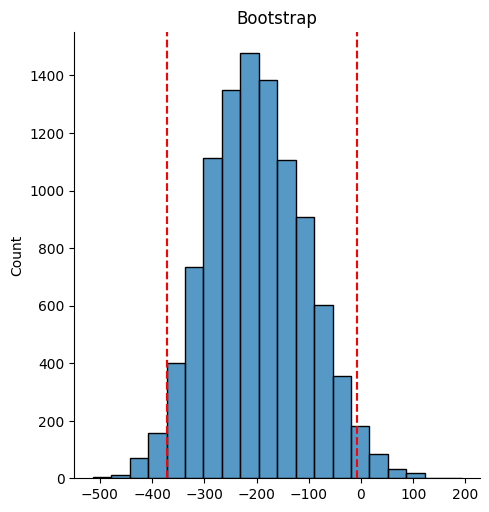

In [29]:
# Observando a distribuição do bootstrap
sns.displot(diferencas_medias, kde=False, bins=20)

# Adicionando um título
plt.title("Bootstrap")

# Adicionando uma linha de corte no limite inferior
plt.axvline(x=limite_inferior, color='r', linestyle='--')

# Adicionando outra linha de corte no limite superior
plt.axvline(x=limite_superior, color='r', linestyle='--')

# Exibindo o gráfico
plt.show()

Podemos observar neste gráfico onde está o intervalo de confiança. Ao todo, tivemos 2 testes apontando que falhamos em rejeitar a H0, sendo um desses testes paramétrico e outro não paramétrico. Enquanto no terceiro teste, rejeitamos a H0. Em casos como esse, a opção mais segura a ser assumida é de que **não temos dados suficientes para rejeitar H0**.

## **Conclusões iniciais**

A média de renda dos usuários é de R$ 51.000,00. Eles costumam ficar 59 dias sem comprar um produto. Nos últimos 2 anos, os gastos com vinho foram bem maiores que com frutas, peixes, doces ou produtos de ouro.

A maior parte das compras é feita diretamente em lojas, com uma média de 5 pedidos por usuário. A idade média dos usuários é de 51 anos.

A maioria dos clientes possui graduação e são casados.

As pessoas do status widow tendem a gastar mais.

Quanto menos filhos uma pessoa da nossa base tem, menor é o gasto que ela faz.

Quando uma pessoa tem renda maior que R$ 35.000,00, ela tende a gastar mais.

Não temos dados suficientes para assumir que pessoas que apresentaram uma reclamação gastam mais do que aquelas que não apresentam.

### **O que poderia ser feito com as informações que temos até aqui ?**


Com base nas análises realizadas, existem algumas sugestões que podem estar alinhadas com o intuito de aumentar o lucro da empresa, sendo elas:

**Aumentar a frequência de compra dos clientes.** A média de 59 dias entre uma compra e outra é bastante alta. A empresa pode investir em estratégias para aumentar a frequência de compra, como:

- Ofertas e promoções direcionadas para clientes que não compram há algum tempo;
  - A empresa pode oferecer descontos, brindes ou outros benefícios para incentivar esses clientes a voltarem a comprar.
- Programas de fidelidade que oferecem benefícios aos clientes que compram com frequência;
  - Esses programas podem incluir pontos que podem ser trocados por produtos ou serviços, descontos progressivos ou acesso a eventos exclusivos.

**Foco nos clientes com renda maior que R$ 35.000,00.** Esses clientes são os que mais gastam, portanto, a empresa deve investir em estratégias para atrair e reter esses clientes. Algumas ideias são:

- Oferecer produtos e serviços de maior valor agregado;
  - A empresa pode oferecer produtos e serviços exclusivos ou personalizados, que atendam às necessidades e aos desejos desses clientes.
- Personalizar a comunicação com esses clientes, de acordo com seus interesses;
  - A empresa pode enviar e-mails, SMS ou mensagens personalizadas, de acordo com os interesses desses clientes (Sempre respeitando as regulamentações da ANATEL e da LGPD).
- Oferecer programas de relacionamento exclusivos para esses clientes;
  - Esses programas podem oferecer benefícios especiais, como descontos, brindes ou acesso a eventos exclusivos.

**Explorar um pouco mais o fato de que a maioria de seus clientes são casados.** Esses clientes podem estar interessados em produtos e serviços relacionados à família, como:

- Oferecer produtos e serviços relacionados à família;
  - A empresa pode focar um pouco mais em produtos para ocasiões especiais, como casamentos, aniversários ou festas de fim de ano